## EDA And Feature Engineering Of Google Play Store Dataset

    1. Problem statement. Today, 185 million diffrent apps are available for user to download. Android user have even more from which to choose, with 2.56 million available through the Google Play Store. These apps have come to play a huge role in the way we live our lives today. Our Objective is to find the Most Popular Category, find the App with largest number of installs, the App with largest size etc.
    2. Data Collection.

The data consists of 20 column and 10841 rows.

### Steps We Are Going to Follow

    1.Data Cleaning
    2.Exploratiry Data Analysis
    3.Feature Engineering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [5]:
df.shape

(10841, 13)

In [6]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  str    
 1   Category        10841 non-null  str    
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  str    
 4   Size            10841 non-null  str    
 5   Installs        10841 non-null  str    
 6   Type            10840 non-null  str    
 7   Price           10841 non-null  str    
 8   Content Rating  10840 non-null  str    
 9   Genres          10841 non-null  str    
 10  Last Updated    10841 non-null  str    
 11  Current Ver     10833 non-null  str    
 12  Android Ver     10838 non-null  str    
dtypes: float64(1), str(12)
memory usage: 1.1 MB


In [7]:
## Summary of the dataset

df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [8]:
## Missing values

df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### Insights and observation

The dataset has missing values

In [9]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


## Data Cleaning Step

In [10]:
## Check if all the values in number of Reviews

df['Reviews'].unique()

<StringArray>
[   '159',    '967',  '87510', '215644',    '167',    '178',  '36815',
  '13791',    '121',  '13880',
 ...
   '2036',  '56496', '376223',    '785',   '5775',    '885',  '88486',
    '603',   '1195', '398307']
Length: 6002, dtype: str

In [11]:
df['Reviews'].str.isnumeric().sum()

np.int64(10840)

In [12]:
df[~df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [13]:
df_copy = df.copy()

In [14]:
df_copy = df_copy.drop(df_copy.index[10472])

In [15]:
df_copy[~df_copy['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [16]:
## Convert Reviews Datatype to int

df_copy['Reviews'] = df_copy['Reviews'].astype(int)

In [17]:
df_copy.info()

<class 'pandas.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  str    
 1   Category        10840 non-null  str    
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  str    
 5   Installs        10840 non-null  str    
 6   Type            10839 non-null  str    
 7   Price           10840 non-null  str    
 8   Content Rating  10840 non-null  str    
 9   Genres          10840 non-null  str    
 10  Last Updated    10840 non-null  str    
 11  Current Ver     10832 non-null  str    
 12  Android Ver     10838 non-null  str    
dtypes: float64(1), int64(1), str(11)
memory usage: 1.2 MB


In [18]:
df_copy['Size'].unique()

<StringArray>
[  '19M',   '14M',  '8.7M',   '25M',  '2.8M',  '5.6M',   '29M',   '33M',
  '3.1M',   '28M',
 ...
  '467k',  '157k',   '44k',  '676k',   '67k',  '552k',  '885k', '1020k',
  '582k',  '619k']
Length: 461, dtype: str

In [19]:
## Check null values in Size column

df_copy['Size'].isnull().sum()

np.int64(0)

In [20]:
df_copy['Size'] = df_copy['Size'].str.replace('M', '000')
df_copy['Size'] = df_copy['Size'].str.replace('k', '')
df_copy['Size'] = df_copy['Size'].replace('Varies with device', np.nan)
df_copy['Size'] = df_copy['Size'].astype(float)

In [21]:
df_copy['Size']

0        19000.0
1        14000.0
2            8.7
3        25000.0
4            2.8
          ...   
10836    53000.0
10837        3.6
10838        9.5
10839        NaN
10840    19000.0
Name: Size, Length: 10840, dtype: float64

In [22]:
df_copy['Installs'].unique()

<StringArray>
[       '10,000+',       '500,000+',     '5,000,000+',    '50,000,000+',
       '100,000+',        '50,000+',     '1,000,000+',    '10,000,000+',
         '5,000+',   '100,000,000+', '1,000,000,000+',         '1,000+',
   '500,000,000+',            '50+',           '100+',           '500+',
            '10+',             '1+',             '5+',             '0+',
              '0']
Length: 21, dtype: str

In [23]:
df_copy['Price'].unique()

<StringArray>
[      '0',   '$4.99',   '$3.99',   '$6.99',   '$1.49',   '$2.99',   '$7.99',
   '$5.99',   '$3.49',   '$1.99',   '$9.99',   '$7.49',   '$0.99',   '$9.00',
   '$5.49',  '$10.00',  '$24.99',  '$11.99',  '$79.99',  '$16.99',  '$14.99',
   '$1.00',  '$29.99',  '$12.99',   '$2.49',  '$10.99',   '$1.50',  '$19.99',
  '$15.99',  '$33.99',  '$74.99',  '$39.99',   '$3.95',   '$4.49',   '$1.70',
   '$8.99',   '$2.00',   '$3.88',  '$25.99', '$399.99',  '$17.99', '$400.00',
   '$3.02',   '$1.76',   '$4.84',   '$4.77',   '$1.61',   '$2.50',   '$1.59',
   '$6.49',   '$1.29',   '$5.00',  '$13.99', '$299.99', '$379.99',  '$37.99',
  '$18.99', '$389.99',  '$19.90',   '$8.49',   '$1.75',  '$14.00',   '$4.85',
  '$46.99', '$109.99', '$154.99',   '$3.08',   '$2.59',   '$4.80',   '$1.96',
  '$19.40',   '$3.90',   '$4.59',  '$15.46',   '$3.04',   '$4.29',   '$2.60',
   '$3.28',   '$4.60',  '$28.99',   '$2.95',   '$2.90',   '$1.97', '$200.00',
  '$89.99',   '$2.56',  '$30.99',   '$3.61', '$394

In [24]:
chars_to_remove = ['+', ',', '$']
cols_to_clean = ['Installs', 'Price']
for item in chars_to_remove:
    for cols in cols_to_clean:
        df_copy[cols] = df_copy[cols].str.replace(item, '')

In [25]:
df_copy['Installs'].unique()

<StringArray>
[     '10000',     '500000',    '5000000',   '50000000',     '100000',
      '50000',    '1000000',   '10000000',       '5000',  '100000000',
 '1000000000',       '1000',  '500000000',         '50',        '100',
        '500',         '10',          '1',          '5',          '0']
Length: 20, dtype: str

In [26]:
df_copy['Price'].unique()

<StringArray>
[     '0',   '4.99',   '3.99',   '6.99',   '1.49',   '2.99',   '7.99',
   '5.99',   '3.49',   '1.99',   '9.99',   '7.49',   '0.99',   '9.00',
   '5.49',  '10.00',  '24.99',  '11.99',  '79.99',  '16.99',  '14.99',
   '1.00',  '29.99',  '12.99',   '2.49',  '10.99',   '1.50',  '19.99',
  '15.99',  '33.99',  '74.99',  '39.99',   '3.95',   '4.49',   '1.70',
   '8.99',   '2.00',   '3.88',  '25.99', '399.99',  '17.99', '400.00',
   '3.02',   '1.76',   '4.84',   '4.77',   '1.61',   '2.50',   '1.59',
   '6.49',   '1.29',   '5.00',  '13.99', '299.99', '379.99',  '37.99',
  '18.99', '389.99',  '19.90',   '8.49',   '1.75',  '14.00',   '4.85',
  '46.99', '109.99', '154.99',   '3.08',   '2.59',   '4.80',   '1.96',
  '19.40',   '3.90',   '4.59',  '15.46',   '3.04',   '4.29',   '2.60',
   '3.28',   '4.60',  '28.99',   '2.95',   '2.90',   '1.97', '200.00',
  '89.99',   '2.56',  '30.99',   '3.61', '394.99',   '1.26',   '1.20',
   '1.04']
Length: 92, dtype: str

In [27]:
df_copy['Installs'] = df_copy['Installs'].astype(int)
df_copy['Price'] = df_copy['Price'].astype(float)

In [28]:
df_copy.info()

<class 'pandas.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  str    
 1   Category        10840 non-null  str    
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  str    
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  str    
 9   Genres          10840 non-null  str    
 10  Last Updated    10840 non-null  str    
 11  Current Ver     10832 non-null  str    
 12  Android Ver     10838 non-null  str    
dtypes: float64(3), int64(2), str(8)
memory usage: 1.2 MB


In [29]:
## Handling 'Last update' feature

df_copy['Last Updated'].unique()

<StringArray>
[   'January 7, 2018',   'January 15, 2018',     'August 1, 2018',
       'June 8, 2018',      'June 20, 2018',     'March 26, 2017',
     'April 26, 2018',      'June 14, 2018', 'September 20, 2017',
       'July 3, 2018',
 ...
  'November 23, 2015',      'June 17, 2012',  'February 27, 2015',
  'December 18, 2013',   'February 6, 2012',  'November 25, 2014',
       'May 19, 2016',   'January 20, 2014',  'February 16, 2014',
     'March 23, 2014']
Length: 1377, dtype: str

In [30]:
df_copy['Last Updated'] = pd.to_datetime(df_copy['Last Updated'])
df_copy['Day'] = df_copy['Last Updated'].dt.day
df_copy['Month'] = df_copy['Last Updated'].dt.month
df_copy['Year'] = df_copy['Last Updated'].dt.year

In [31]:
df_copy.info()

<class 'pandas.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  str           
 1   Category        10840 non-null  str           
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int64         
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  int64         
 6   Type            10839 non-null  str           
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  str           
 9   Genres          10840 non-null  str           
 10  Last Updated    10840 non-null  datetime64[us]
 11  Current Ver     10832 non-null  str           
 12  Android Ver     10838 non-null  str           
 13  Day             10840 non-null  int32         
 14  Month           10840 non-null  int32         
 15  Year            10

In [32]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [33]:
df_copy.to_csv('PlayStoreCleaned.csv')

## EDA

In [34]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [35]:
df_copy[df_copy.duplicated('App')].shape

(1181, 16)

## Observation 
The dataset has duplicate records

In [36]:
df_copy = df_copy.drop_duplicates(subset=['App'], keep='first')

In [37]:
df_copy.shape

(9659, 16)

## Explore data 

In [38]:
numeric_feature = [feature for feature in df_copy.columns if df_copy[feature].dtype != 'str']
categorical_feature = [feature for feature in df_copy.columns if df_copy[feature].dtype == 'str']

print('We have {} numerical features : {}'.format(len(numeric_feature), numeric_feature))
print('\nWe have {} categorical features : {}'.format(len(categorical_feature), categorical_feature))

We have 9 numerical features : ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated', 'Day', 'Month', 'Year']

We have 7 categorical features : ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


## Feature Information

1. App: Name of the App.
2. Category: Category under which the App falls.
3. Rating: Application's rating on playstore.
4. Reviws: Number of reviews of App.
5. Size: Size of the App.
6. Installs: Number of Installs of the App.
7. Type: If the App is free/paid.
8. Price: Price of the app (0 if it is Free)
9. Content Rating: Appropiate Target audience of the App.
10. Genres: Genre under which the App falls.
11. Last Updated: Date when the App was last updated.
12. Current Ver: Current version of the Application.
13. Android ver: Minimum Android Version required to run the App.

In [ ]:
## Proportion of count data on categorical columns
for col in categorical_feature:
    print(df[col].value_counts(normalize=True)*100)
    print('----------------------------------------')

App
ROBLOX                                               0.083018
CBS Sports App - Scores, News, Stats & Watch Live    0.073794
Duolingo: Learn Languages Free                       0.064570
Candy Crush Saga                                     0.064570
8 Ball Pool                                          0.064570
                                                       ...   
Sya9a Maroc - FR                                     0.009224
Fr. Mike Schmitz Audio Teachings                     0.009224
Parkinson Exercices FR                               0.009224
The SCP Foundation DB fr nn5n                        0.009224
iHoroscope - 2018 Daily Horoscope & Astrology        0.009224
Name: proportion, Length: 9660, dtype: float64
-----------------------------=----------
Category
FAMILY                 18.190204
GAME                   10.552532
TOOLS                   7.776035
MEDICAL                 4.270824
BUSINESS                4.243151
PRODUCTIVITY            3.911078
PERSONALIZATION    

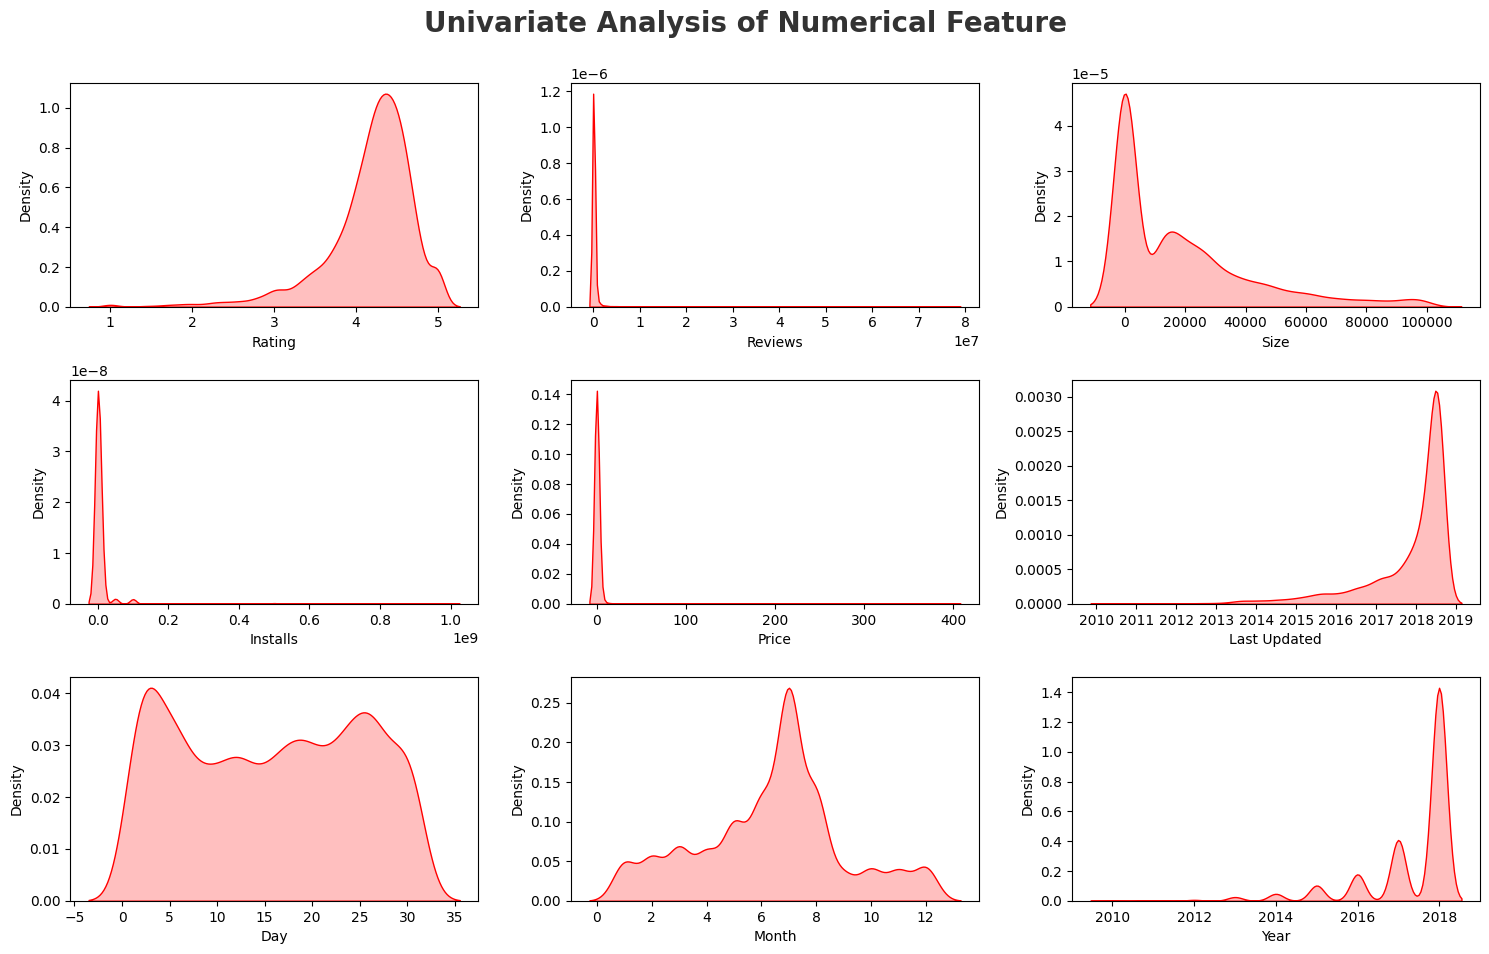

In [40]:
## Proportion of count data on numerical columns

plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Feature', fontsize = 20, fontweight = 'bold', alpha = 0.8, y = 1.)

for i in range(0, len(numeric_feature)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x = df_copy[numeric_feature[i]], shade = True, color='r')
    plt.xlabel(numeric_feature[i])
    plt.tight_layout()

### Observations
Rating and year is left skewed while Reviews, Size, Install and Price are right skewed

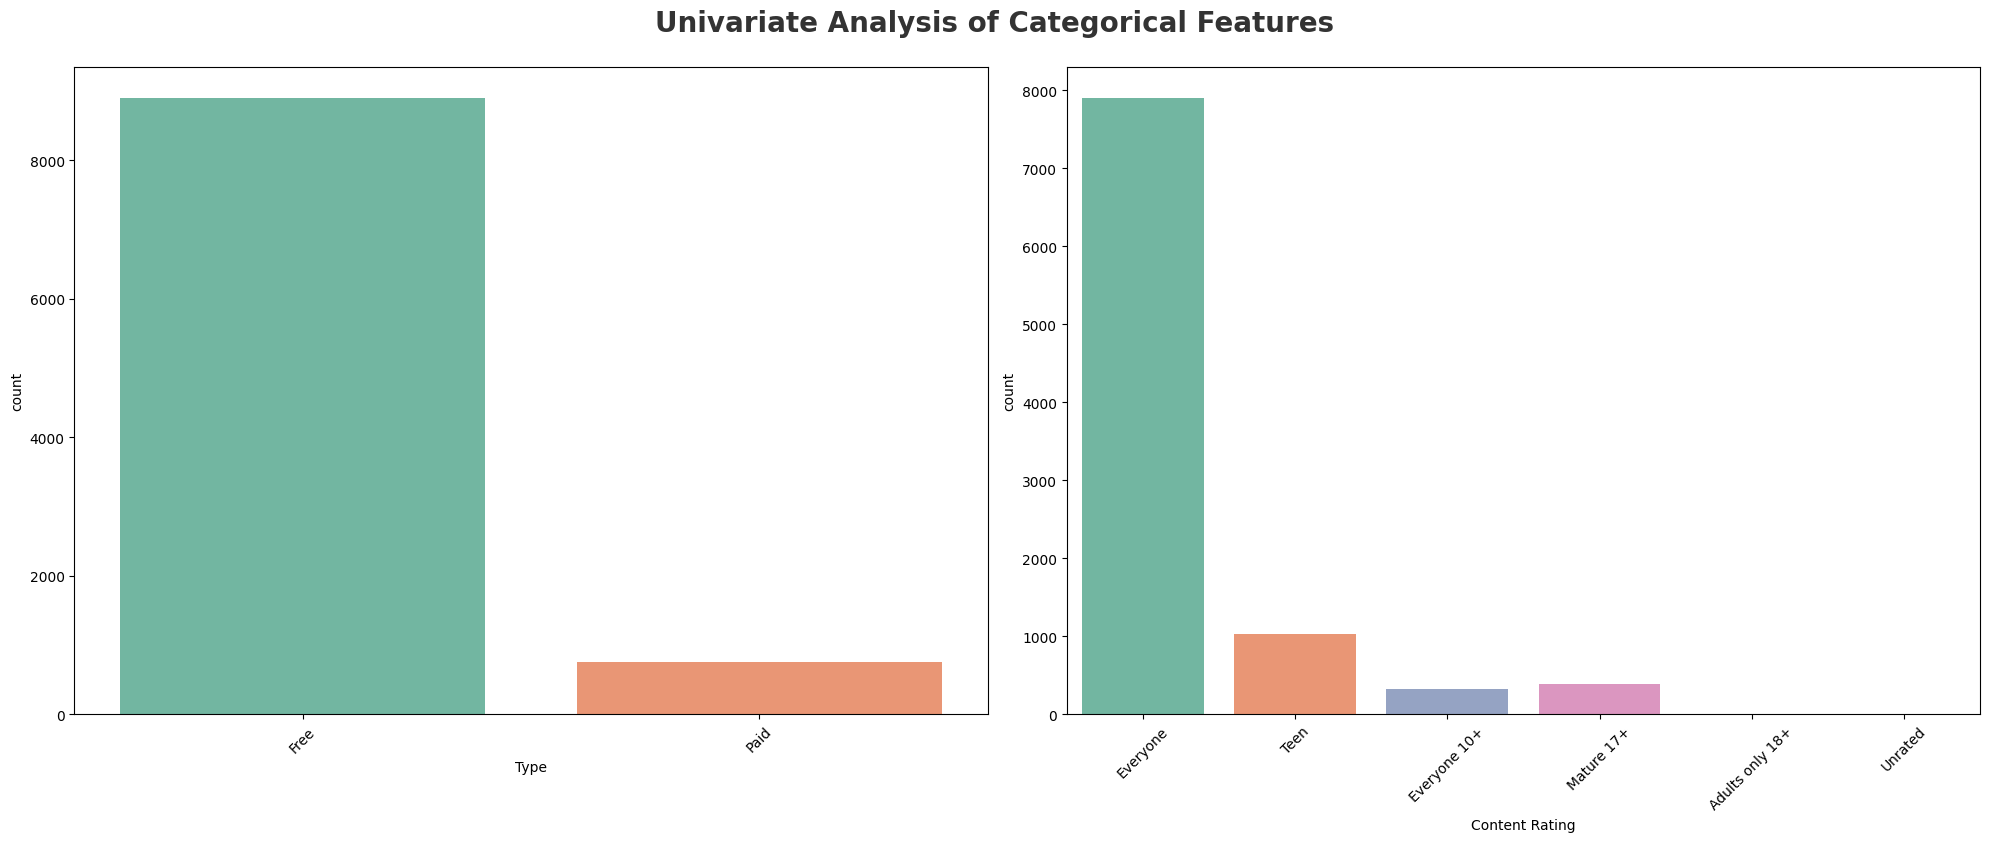

In [41]:
## Categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
category = ['Type', 'Content Rating']
for i in range (0, len(category)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df_copy[category[i]],palette="Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

<Axes: >

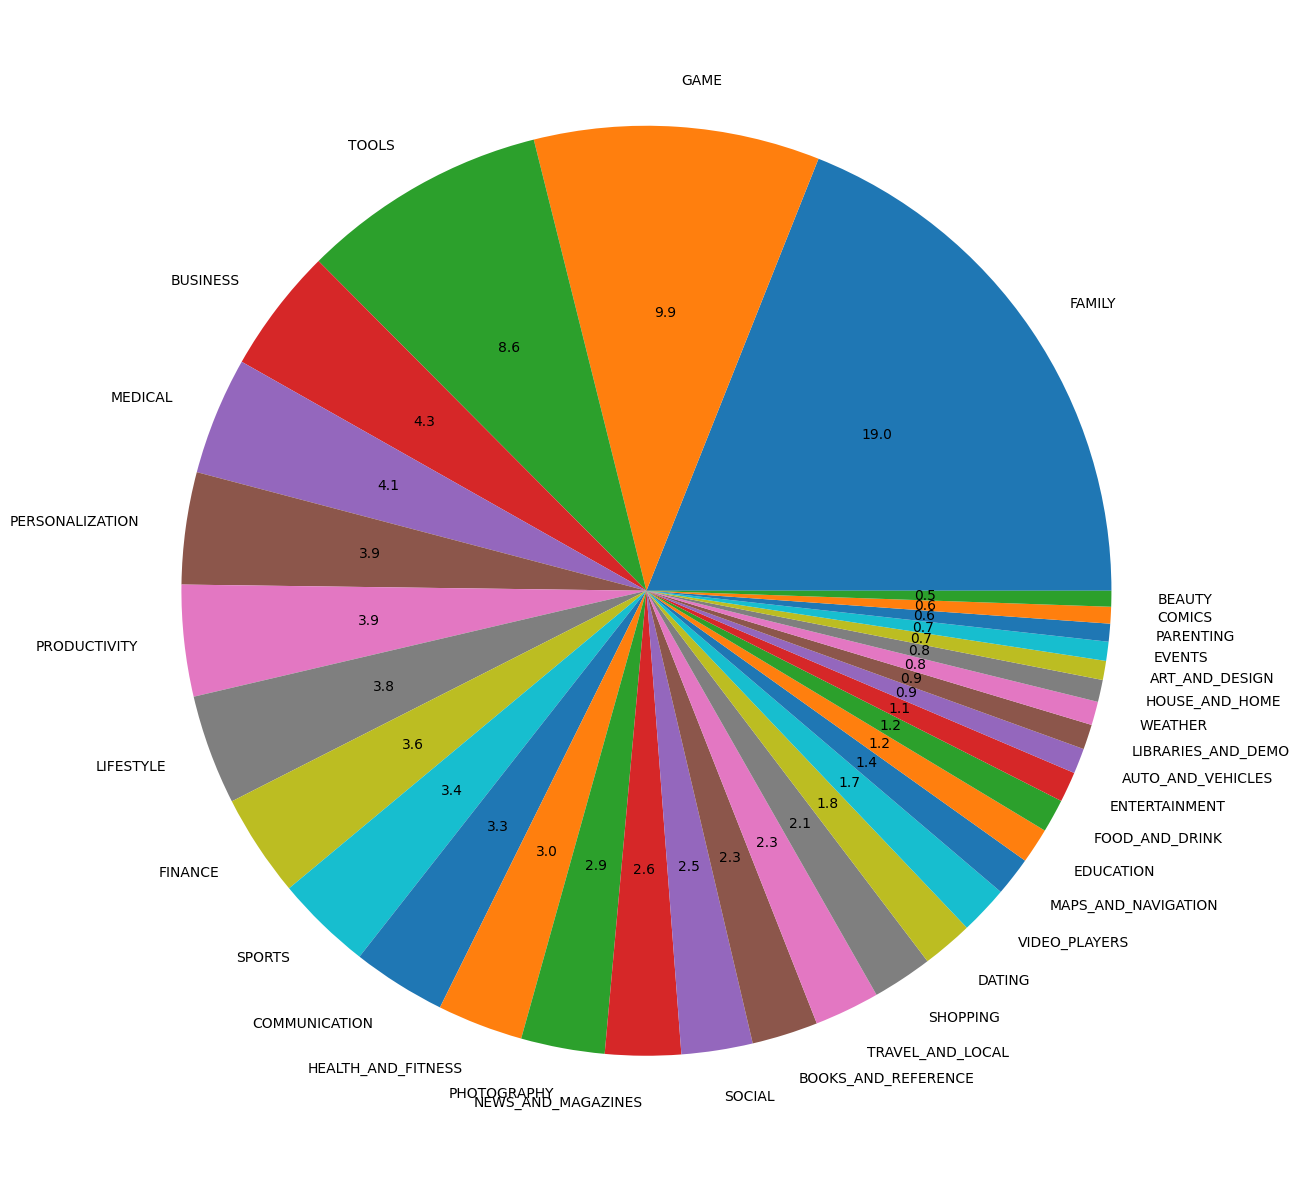

In [42]:
## Which is the most popular app category?

df_copy['Category'].value_counts().plot.pie(y=df_copy['Category'], figsize=(15, 16), autopct='%1.1f')

### Observations
1. There are more kinds of apps in playstore which are under category of family, game & tools
2. Beauty, Comics, Arts and Weather kinds of apps are very less in playstore

In [43]:
## Proportion of count data on categorical columns
for col in categorical_feature:
    print(df[col].value_counts(normalize=True)*100)
    print('-----------------------------=----------')

App
ROBLOX                                               0.083018
CBS Sports App - Scores, News, Stats & Watch Live    0.073794
Duolingo: Learn Languages Free                       0.064570
Candy Crush Saga                                     0.064570
8 Ball Pool                                          0.064570
                                                       ...   
Sya9a Maroc - FR                                     0.009224
Fr. Mike Schmitz Audio Teachings                     0.009224
Parkinson Exercices FR                               0.009224
The SCP Foundation DB fr nn5n                        0.009224
iHoroscope - 2018 Daily Horoscope & Astrology        0.009224
Name: proportion, Length: 9660, dtype: float64
-----------------------------=----------
Category
FAMILY                 18.190204
GAME                   10.552532
TOOLS                   7.776035
MEDICAL                 4.270824
BUSINESS                4.243151
PRODUCTIVITY            3.911078
PERSONALIZATION    

In [44]:
## Top 10 App Categories

category = pd.DataFrame(df['Category'].value_counts())
category.rename(columns={'Category':'Count'}, inplace=True)

In [45]:
category

,count
Category,
FAMILY,1972
GAME,1144
TOOLS,843
MEDICAL,463
BUSINESS,460
PRODUCTIVITY,424
PERSONALIZATION,392
COMMUNICATION,387
SPORTS,384


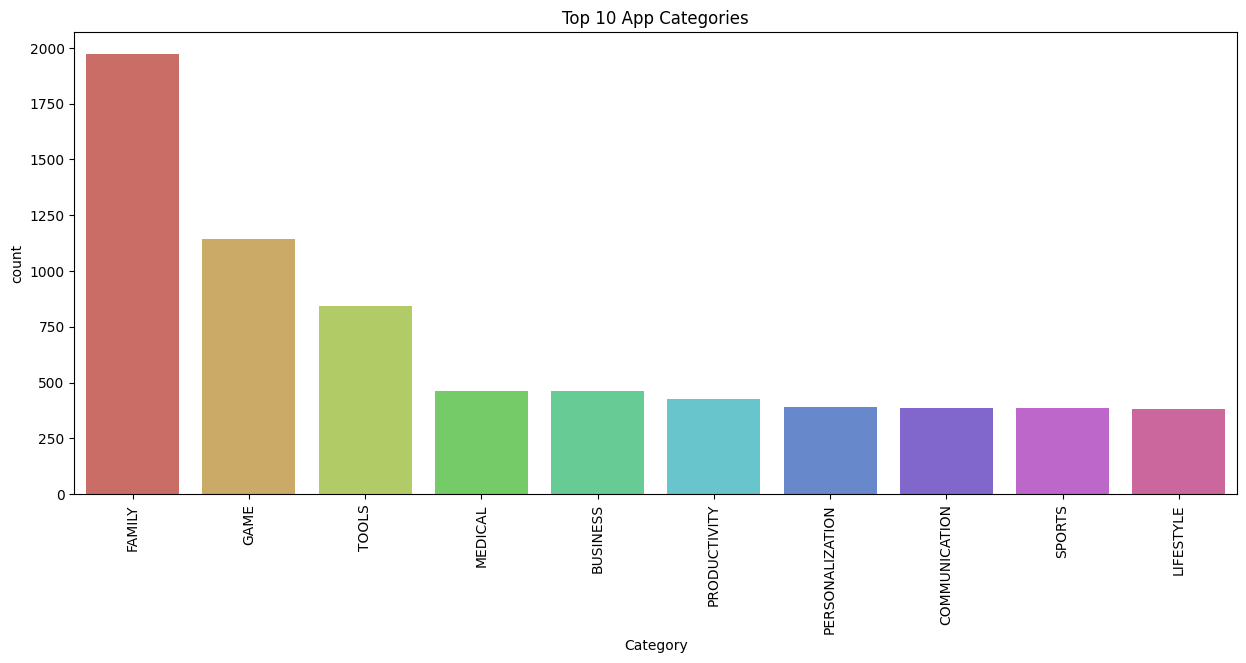

In [46]:
## Top 10 App

plt.figure(figsize=(15,6))
sns.barplot(x=category.index[:10], y='count', data=category[:10], palette='hls')
plt.title('Top 10 App Categories')
plt.xticks(rotation = 90)
plt.show()

### Insights
1. Family category has the most number of apps with 18% of apps belonging to it, followed by Games category which has 11% of the apps.
2. Least number of apps belong to the Beauty category with less than 1% of the total apps belonging to it.

Text(0.5, 1.0, 'Most Popular Categories in Play Store')

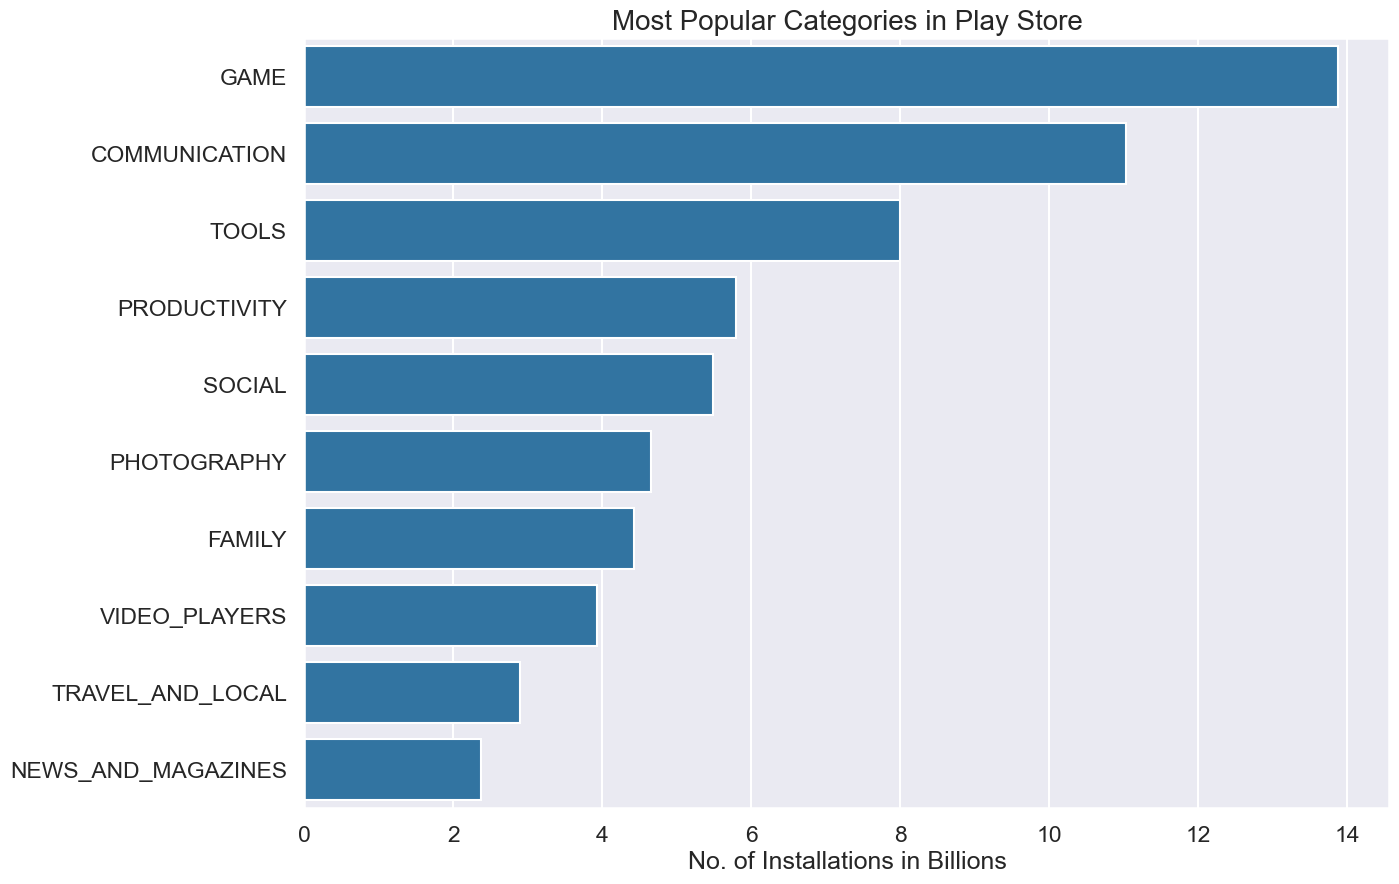

In [81]:
## Creating Chart of largest number of installation
df_cat_installs = df_copy.groupby(['Category'])['Installs'].sum().sort_values(ascending = False).reset_index()
df_cat_installs.Installs = df_cat_installs.Installs/1000000000# converting into billions
df2 = df_cat_installs.head(10)
plt.figure(figsize = (14,10))
sns.set_context("talk")
sns.set_style("darkgrid")

ax = sns.barplot(x = 'Installs' , y = 'Category' , data = df2 )
ax.set_xlabel('No. of Installations in Billions')
ax.set_ylabel('')
ax.set_title("Most Popular Categories in Play Store", size = 20)

## Insights
1. Out of all the categories "GAME" has the most number of Installations.
2. With almost 35 Billion Installations GAME is the most popular Category in Google App store

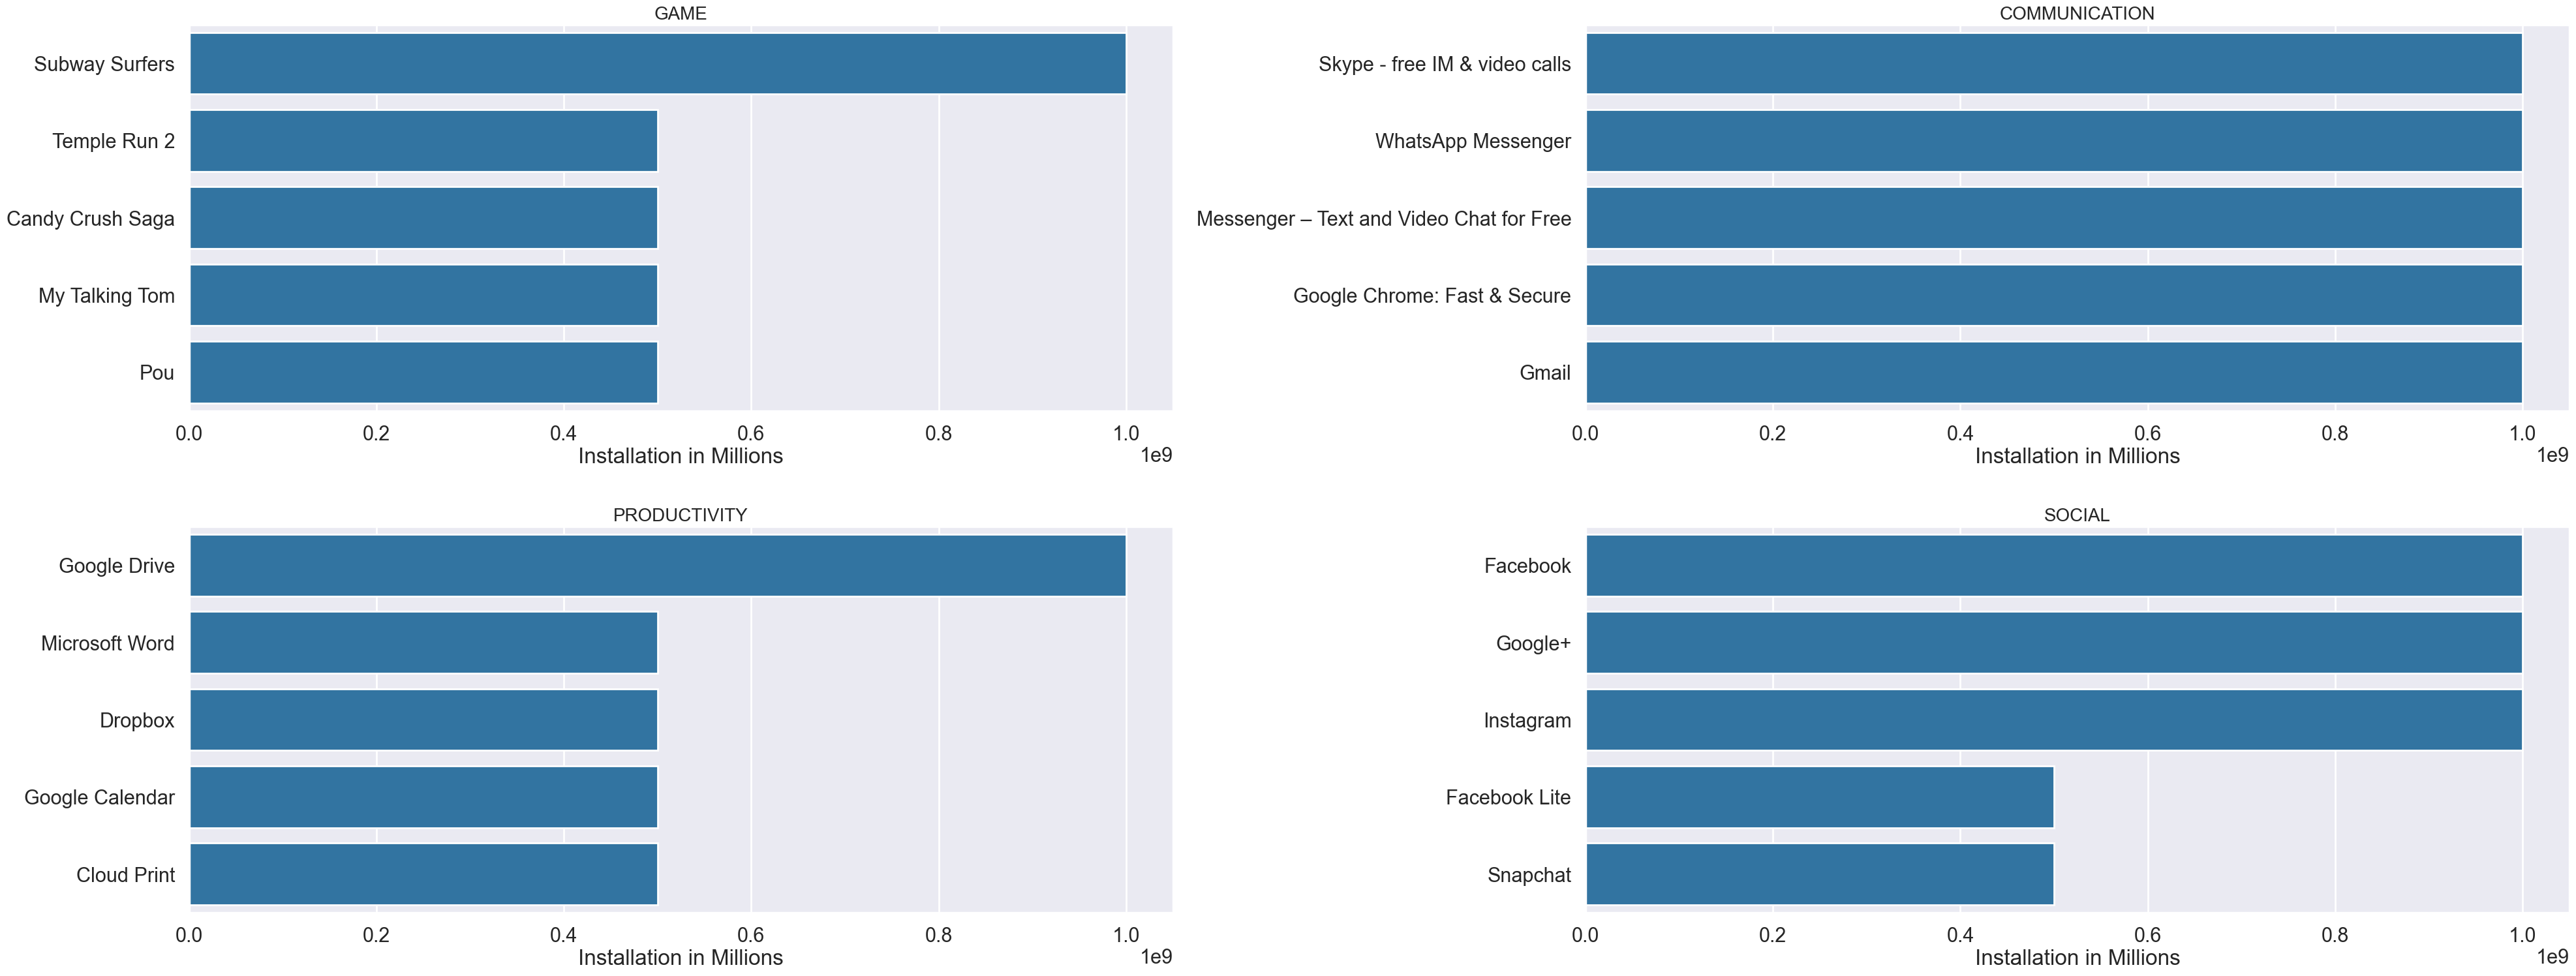

In [82]:
## What are the top 5 most installed Apps in each popular categories

dfa = df_copy.groupby(['Category' ,'App'])['Installs'].sum().reset_index()
dfa = dfa.sort_values('Installs', ascending = False)
apps = ['GAME', 'COMMUNICATION', 'PRODUCTIVITY', 'SOCIAL' ]
sns.set_context("poster")
sns.set_style("darkgrid")

plt.figure(figsize=(40,30))

for i,app in enumerate(apps):
    df2 = dfa[dfa.Category == app]
    df3 = df2.head(5)
    plt.subplot(4,2,i+1)
    sns.barplot(data= df3,x= 'Installs' ,y='App' )
    plt.xlabel('Installation in Millions')
    plt.ylabel('')
    plt.title(app,size = 20)
    
plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

## Insights
- Most popular game is Subway Surfers.
- Most popular communication app is Hangouts.
- Most popular productivity app is Google Drive.
- Most popular social app is Instagram.

## 📌 Final Conclusion

In this project, we performed data cleaning, feature engineering, and exploratory data analysis (EDA) on the Google Play Store dataset to uncover meaningful business insights.

During the data cleaning phase, we handled missing values, removed duplicate records, converted data types, cleaned special characters from numerical columns, and transformed date features into structured components such as day, month, and year. This ensured the dataset was accurate and ready for analysis.

Through exploratory analysis, we identified key patterns:

The GAME category has the highest number of total installations, making it the most dominant segment on the Play Store.

Categories such as Family, Game, and Tools contain the highest number of applications.

Most apps are Free, indicating a strong freemium-based market strategy.

Installations and reviews are highly right-skewed, meaning only a small number of apps achieve extremely high popularity.

Very few applications achieve a perfect 5.0 rating, showing that maintaining consistent user satisfaction at scale is challenging.

Within popular categories, certain apps significantly outperform others in terms of installations, indicating strong brand dominance and user preference.

Overall, the analysis reveals that the Google Play Store ecosystem is highly competitive, with a small percentage of apps driving the majority of installations. Entertainment, communication, and productivity-based applications dominate user engagement.

This project demonstrates strong skills in:

Data Cleaning & Preprocessing

Exploratory Data Analysis

Data Visualization

Extracting Business Insights from Raw Data

In [84]:
!jupyter nbconvert PlayStore.ipynb --to html

[NbConvertApp] Converting notebook PlayStore.ipynb to html
d:\Python_3\venv\Lib\site-packages\nbformat\__init__.py:96: MissingIDFieldWarning: Cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)
[NbConvertApp] WARNING | Alternative text is missing on 6 image(s).
[NbConvertApp] Writing 1153690 bytes to PlayStore.html


In [85]:
!jupyter nbconvert --to pdf PlayStore.ipynb

[NbConvertApp] Converting notebook PlayStore.ipynb to pdf
d:\Python_3\venv\Lib\site-packages\nbformat\__init__.py:96: MissingIDFieldWarning: Cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)
[NbConvertApp] Support files will be in PlayStore_files\
[NbConvertApp] Making directory .\PlayStore_files
[NbConvertApp] Writing 92019 bytes to notebook.tex
[NbConvertApp] Building PDF
Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "D:\Python_3\venv\Scripts\jupyter-nbconvert.EXE\__main__.py", line 6, in <module>
  File "d:\Python_3\venv\Lib\site-packages\jupyter_core\application.py", line 284, in launch_instance
    super().launch_instance(a